In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df=pd.read_excel("project.xlsx",parse_dates=["Date"],index_col=[0])

In [3]:
print(df.index.freq)

None


In [4]:
df.shape

(861, 2)

In [5]:
df.head()

,Wave,Wind
Date,,
2020-01-01,1526,7
2020-01-02,1478,5
2020-01-03,1441,6
2020-01-04,1431,6
2020-01-05,1469,9


In [6]:
df.tail()

,Wave,Wind
Date,,
2022-05-06,1501,6
2022-05-07,1483,3
2022-05-08,1436,3
2022-05-09,1453,6
2022-05-10,1518,6


In [7]:
test_split=round(len(df)*0.20)

In [8]:
test_split

172

In [9]:
df_for_training=df[:-172]
df_for_testing=df[-172:]

In [10]:
print(df_for_training.shape)
print(df_for_testing.shape)

(689, 2)
(172, 2)


In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [12]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [13]:
df_for_training_scaled

array([[0.8432856 , 0.23809524],
       [0.83031613, 0.14285714],
       [0.82031883, 0.19047619],
       ...,
       [0.87327749, 0.0952381 ],
       [0.85787625, 0.14285714],
       [0.86760335, 0.42857143]])

In [14]:
df_for_training_scaled.shape

(689, 2)

In [15]:
df_for_testing_scaled.shape

(172, 2)

In [16]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)   

In [17]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [18]:
trainX.shape

(659, 30, 2)

In [19]:
testX,testY=createXY(df_for_testing_scaled,30)

In [20]:
trainX[0]

array([[0.8432856 , 0.23809524],
       [0.83031613, 0.14285714],
       [0.82031883, 0.19047619],
       [0.81761686, 0.19047619],
       [0.82788436, 0.33333333],
       [0.83734126, 0.23809524],
       [0.82112942, 0.19047619],
       [0.83058633, 0.23809524],
       [0.84841935, 0.23809524],
       [0.8332883 , 0.47619048],
       [0.80870035, 0.23809524],
       [0.82085923, 0.0952381 ],
       [0.83490948, 0.23809524],
       [0.83815185, 0.0952381 ],
       [0.8530127 , 0.04761905],
       [0.84139422, 0.0952381 ],
       [0.84760875, 0.14285714],
       [0.85949743, 0.04761905],
       [0.86030802, 0.19047619],
       [0.86490138, 0.0952381 ],
       [0.8524723 , 0.0952381 ],
       [0.86165901, 0.0952381 ],
       [0.        , 0.14285714],
       [0.92839773, 0.19047619],
       [0.8524723 , 0.14285714],
       [0.85679546, 0.0952381 ],
       [0.86652256, 0.0952381 ],
       [0.85976763, 0.04761905],
       [0.86598217, 0.23809524],
       [0.8427452 , 0.04761905]])

In [21]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (659, 30, 2)
trainY Shape--  (659,)


In [22]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (142, 30, 2)
testY Shape--  (142,)


In [23]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.8432856  0.23809524]
 [0.83031613 0.14285714]
 [0.82031883 0.19047619]
 [0.81761686 0.19047619]
 [0.82788436 0.33333333]
 [0.83734126 0.23809524]
 [0.82112942 0.19047619]
 [0.83058633 0.23809524]
 [0.84841935 0.23809524]
 [0.8332883  0.47619048]
 [0.80870035 0.23809524]
 [0.82085923 0.0952381 ]
 [0.83490948 0.23809524]
 [0.83815185 0.0952381 ]
 [0.8530127  0.04761905]
 [0.84139422 0.0952381 ]
 [0.84760875 0.14285714]
 [0.85949743 0.04761905]
 [0.86030802 0.19047619]
 [0.86490138 0.0952381 ]
 [0.8524723  0.0952381 ]
 [0.86165901 0.0952381 ]
 [0.         0.14285714]
 [0.92839773 0.19047619]
 [0.8524723  0.14285714]
 [0.85679546 0.0952381 ]
 [0.86652256 0.0952381 ]
 [0.85976763 0.04761905]
 [0.86598217 0.23809524]
 [0.8427452  0.04761905]]

trainY[0]--  0.8473385571467171


In [24]:
trainY[0]

0.8473385571467171

In [25]:
trainY.shape

(659,)

In [26]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,2)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(2))
   

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


In [28]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
21/21 [==============================] - 5s 73ms/step - loss: 0.1487 - val_loss: 0.0210
Epoch 2/8
21/21 [==============================] - 1s 36ms/step - loss: 0.0238 - val_loss: 0.0024
Epoch 3/8
21/21 [==============================] - 1s 33ms/step - loss: 0.0172 - val_loss: 0.0019
Epoch 4/8
21/21 [==============================] - 1s 34ms/step - loss: 0.0148 - val_loss: 0.0029
Epoch 5/8
21/21 [==============================] - 1s 34ms/step - loss: 0.0150 - val_loss: 0.0020
Epoch 6/8
21/21 [==============================] - 1s 33ms/step - loss: 0.0149 - val_loss: 0.0021
Epoch 7/8
21/21 [==============================] - 1s 33ms/step - loss: 0.0142 - val_loss: 0.0027
Epoch 8/8
21/21 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 1/8
21/21 [==============================] - 5s 73ms/step - loss: 0.1435 - val_loss: 0.0213
Epoch 2/8
21/21 [==============================] - 1s 33ms/step - loss: 0.0209 - val_loss: 0.0042
Epoch 3/8
21/21 [=======================

In [29]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}

In [30]:
my_model=grid_search.best_estimator_.model

In [31]:
my_model

In [32]:
prediction=my_model.predict(testX)

In [33]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.8089098  0.80576867]
 [0.80998975 0.80697864]
 [0.8115978  0.8087948 ]
 [0.81267947 0.8102687 ]
 [0.812344   0.8103893 ]
 [0.8113156  0.8095251 ]
 [0.81125516 0.8095061 ]
 [0.8101993  0.8085031 ]
 [0.80772084 0.8061262 ]
 [0.8054438  0.8037594 ]
 [0.8040443  0.8022792 ]
 [0.80475134 0.80307037]
 [0.80508107 0.80372804]
 [0.8034026  0.8020554 ]
 [0.8008392  0.7992198 ]
 [0.79688203 0.7949582 ]
 [0.7946783  0.7929438 ]
 [0.7946448  0.7935305 ]
 [0.7955578  0.79503965]
 [0.79498816 0.79482806]
 [0.7956919  0.7956385 ]
 [0.79578227 0.79578453]
 [0.79435104 0.7943152 ]
 [0.79316264 0.7927748 ]
 [0.7887601  0.78790116]
 [0.78631    0.78502446]
 [0.78181595 0.7800116 ]
 [0.7762771  0.77391475]
 [0.77157265 0.76919234]
 [0.76631695 0.76434714]
 [0.7607993  0.7592036 ]
 [0.7577198  0.7559729 ]
 [0.7539757  0.7519223 ]
 [0.75380903 0.7518248 ]
 [0.7557583  0.754114  ]
 [0.75789934 0.7565301 ]
 [0.76045805 0.75920874]
 [0.7626983  0.76136285]
 [0.7567683  0.7538758 ]
 [0.7501467  

In [34]:
prediction.shape

(142, 2)

In [35]:
scaler.inverse_transform(prediction)

array([[1398.775   ,   18.921143],
       [1402.772   ,   18.946552],
       [1408.7235  ,   18.98469 ],
       [1412.7267  ,   19.015642],
       [1411.4851  ,   19.018175],
       [1407.679   ,   19.000027],
       [1407.4553  ,   18.999628],
       [1403.5476  ,   18.978565],
       [1394.3748  ,   18.92865 ],
       [1385.9475  ,   18.878946],
       [1380.768   ,   18.847862],
       [1383.3846  ,   18.864477],
       [1384.605   ,   18.878288],
       [1378.393   ,   18.843164],
       [1368.9058  ,   18.783615],
       [1354.2604  ,   18.694122],
       [1346.1042  ,   18.65182 ],
       [1345.9802  ,   18.66414 ],
       [1349.3594  ,   18.695833],
       [1347.2511  ,   18.69139 ],
       [1349.8557  ,   18.708408],
       [1350.1901  ,   18.711475],
       [1344.8932  ,   18.68062 ],
       [1340.4949  ,   18.64827 ],
       [1324.2012  ,   18.545925],
       [1315.1333  ,   18.485514],
       [1298.5007  ,   18.380243],
       [1278.0016  ,   18.25221 ],
       [1260.5903  ,

In [36]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [37]:
prediction_copies_array.shape

(142, 2)

In [38]:
prediction_copies_array

array([[0.8089098 , 0.80576867],
       [0.80998975, 0.80697864],
       [0.8115978 , 0.8087948 ],
       [0.81267947, 0.8102687 ],
       [0.812344  , 0.8103893 ],
       [0.8113156 , 0.8095251 ],
       [0.81125516, 0.8095061 ],
       [0.8101993 , 0.8085031 ],
       [0.80772084, 0.8061262 ],
       [0.8054438 , 0.8037594 ],
       [0.8040443 , 0.8022792 ],
       [0.80475134, 0.80307037],
       [0.80508107, 0.80372804],
       [0.8034026 , 0.8020554 ],
       [0.8008392 , 0.7992198 ],
       [0.79688203, 0.7949582 ],
       [0.7946783 , 0.7929438 ],
       [0.7946448 , 0.7935305 ],
       [0.7955578 , 0.79503965],
       [0.79498816, 0.79482806],
       [0.7956919 , 0.7956385 ],
       [0.79578227, 0.79578453],
       [0.79435104, 0.7943152 ],
       [0.79316264, 0.7927748 ],
       [0.7887601 , 0.78790116],
       [0.78631   , 0.78502446],
       [0.78181595, 0.7800116 ],
       [0.7762771 , 0.77391475],
       [0.77157265, 0.76919234],
       [0.76631695, 0.76434714],
       [0.

In [39]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [40]:
pred

array([1398.775 , 1402.772 , 1408.7235, 1412.7267, 1411.4851, 1407.679 ,
       1407.4553, 1403.5476, 1394.3748, 1385.9475, 1380.768 , 1383.3846,
       1384.605 , 1378.393 , 1368.9058, 1354.2604, 1346.1042, 1345.9802,
       1349.3594, 1347.2511, 1349.8557, 1350.1901, 1344.8932, 1340.4949,
       1324.2012, 1315.1333, 1298.5007, 1278.0016, 1260.5903, 1241.139 ,
       1220.7181, 1209.3209, 1195.464 , 1194.8472, 1202.0614, 1209.9855,
       1219.4552, 1227.7463, 1205.7993, 1181.2928, 1161.2119, 1142.6917,
       1125.3866, 1110.6884, 1100.8204, 1099.4757, 1106.3883, 1118.2489,
       1126.5782, 1141.1544, 1150.6613, 1154.4705, 1156.5161, 1151.508 ,
       1144.7113, 1140.5045, 1145.8278, 1144.0275, 1146.4476, 1154.759 ,
       1172.6935, 1192.5071, 1214.126 , 1233.9431, 1250.4484, 1254.266 ,
       1250.4283, 1246.0068, 1231.8256, 1212.6736, 1185.0104, 1163.5034,
       1136.9797, 1109.2944, 1088.2703, 1082.3115, 1077.9664, 1073.5686,
       1080.3579, 1096.4062, 1119.19  , 1141.0154, 

In [41]:
original_copies_array = np.repeat(testY,2, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),2)))[:,0]

In [42]:
pred

array([1398.775 , 1402.772 , 1408.7235, 1412.7267, 1411.4851, 1407.679 ,
       1407.4553, 1403.5476, 1394.3748, 1385.9475, 1380.768 , 1383.3846,
       1384.605 , 1378.393 , 1368.9058, 1354.2604, 1346.1042, 1345.9802,
       1349.3594, 1347.2511, 1349.8557, 1350.1901, 1344.8932, 1340.4949,
       1324.2012, 1315.1333, 1298.5007, 1278.0016, 1260.5903, 1241.139 ,
       1220.7181, 1209.3209, 1195.464 , 1194.8472, 1202.0614, 1209.9855,
       1219.4552, 1227.7463, 1205.7993, 1181.2928, 1161.2119, 1142.6917,
       1125.3866, 1110.6884, 1100.8204, 1099.4757, 1106.3883, 1118.2489,
       1126.5782, 1141.1544, 1150.6613, 1154.4705, 1156.5161, 1151.508 ,
       1144.7113, 1140.5045, 1145.8278, 1144.0275, 1146.4476, 1154.759 ,
       1172.6935, 1192.5071, 1214.126 , 1233.9431, 1250.4484, 1254.266 ,
       1250.4283, 1246.0068, 1231.8256, 1212.6736, 1185.0104, 1163.5034,
       1136.9797, 1109.2944, 1088.2703, 1082.3115, 1077.9664, 1073.5686,
       1080.3579, 1096.4062, 1119.19  , 1141.0154, 

In [43]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [1398.775  1402.772  1408.7235 1412.7267 1411.4851 1407.679  1407.4553
 1403.5476 1394.3748 1385.9475 1380.768  1383.3846 1384.605  1378.393
 1368.9058 1354.2604 1346.1042 1345.9802 1349.3594 1347.2511 1349.8557
 1350.1901 1344.8932 1340.4949 1324.2012 1315.1333 1298.5007 1278.0016
 1260.5903 1241.139  1220.7181 1209.3209 1195.464  1194.8472 1202.0614
 1209.9855 1219.4552 1227.7463 1205.7993 1181.2928 1161.2119 1142.6917
 1125.3866 1110.6884 1100.8204 1099.4757 1106.3883 1118.2489 1126.5782
 1141.1544 1150.6613 1154.4705 1156.5161 1151.508  1144.7113 1140.5045
 1145.8278 1144.0275 1146.4476 1154.759  1172.6935 1192.5071 1214.126
 1233.9431 1250.4484 1254.266  1250.4283 1246.0068 1231.8256 1212.6736
 1185.0104 1163.5034 1136.9797 1109.2944 1088.2703 1082.3115 1077.9664
 1073.5686 1080.3579 1096.4062 1119.19   1141.0154 1149.863  1151.7355
 1159.2747 1164.801  1172.4857 1181.4115 1189.4572 1198.3824 1198.1294
 1191.626  1190.2985 1192.4841 1195.5012 1199.7872 1205.9493 119

In [44]:
import matplotlib.pyplot as plt

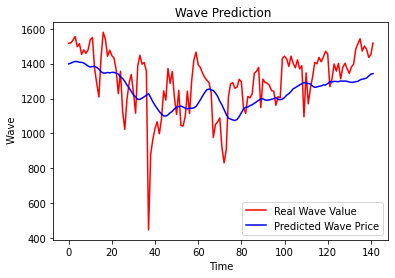

In [45]:
plt.plot(original, color = 'red', label = 'Real Wave Value')
plt.plot(pred, color = 'blue', label = 'Predicted Wave Price')
plt.title(' Wave Prediction')
plt.xlabel('Time')
plt.ylabel(' Wave')
plt.legend()
plt.show()

In [46]:
df_30_days_past=df.iloc[-30:,:]

In [47]:
df_30_days_past

,Wave,Wind
Date,,
2022-04-11,1260,7
2022-04-12,1324,5
2022-04-13,1407,3
2022-04-14,1399,4
2022-04-15,1436,6
2022-04-16,1411,4
2022-04-17,1439,8
2022-04-18,1471,4
2022-04-19,1456,3


In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [52]:
import joblib
scalerfile = 'lstm_prediksi_berlayar.pkl'
joblib.dump(scaler, open(scalerfile, 'wb'))